# Inference

In [12]:
#if you have installed packages previously, just cd PaddleOCR to begin with

In [1]:
from paddleocr import PaddleOCR, draw_ocr

# You can set the parameter `lang` as `ch`, `en`, `french`, `german`, `korean`, `japan`
# for more languages https://paddlepaddle.github.io/PaddleOCR/main/en/ppocr/blog/multi_languages.html#4-inference-and-deployment
# PaddleOCR consist of text detection model, text recognition model and angle classifier model, which allow you to make combination
# check model zoo at https://paddlepaddle.github.io/PaddleOCR/main/en/ppocr/model_list.html#23-multilingual-recognition-modelupdating
# for more parameters https://paddlepaddle.github.io/PaddleOCR/main/en/ppocr/blog/inference_args.html
ocr = PaddleOCR(rec_model_dir='en_PP-OCRv4_rec_infer',det_model_dir='en_PP-OCRv3_det_infer', use_angle_cls=True, lang='en',det_db_box_thresh=0.3,drop_score=0.3)
img_path = 'invoice-template-us-dexter-750px.png'
result = ocr.ocr(img_path, cls=True)
print(result)

# for the first time running the script, it will download the models from url
# Default '~/.paddleocr/', that create location like  '~/.paddleocr/whl/cls'

/home/z890/.conda/envs/padd1/lib/python3.10/site-packages/paddle/utils/cpp_extension/extension_utils.py:711: UserWarning: No ccache found. Please be aware that recompiling all source files may be required. You can download and install ccache from: https://github.com/ccache/ccache/blob/master/doc/INSTALL.md
  warnings.warn(warning_message)


download https://paddleocr.bj.bcebos.com/PP-OCRv3/english/en_PP-OCRv3_det_infer.tar to en_PP-OCRv3_det_infer/en_PP-OCRv3_det_infer.tar


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3910/3910 [00:00<00:00, 6621.56it/s]


download https://paddleocr.bj.bcebos.com/PP-OCRv4/english/en_PP-OCRv4_rec_infer.tar to en_PP-OCRv4_rec_infer/en_PP-OCRv4_rec_infer.tar


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 13149.15it/s]

[2025/05/28 14:06:16] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.3, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_char_dict_path='/home/z890/Downloads/ml_sample/OCR/Paddle

[2025/05/28 14:06:17] ppocr DEBUG: dt_boxes num : 47, elapsed : 0.22879862785339355
[2025/05/28 14:06:17] ppocr DEBUG: cls num  : 47, elapsed : 0.04835796356201172
[2025/05/28 14:06:18] ppocr DEBUG: rec_res num  : 47, elapsed : 1.3487722873687744
[[[[[66.0, 48.0], [242.0, 48.0], [242.0, 103.0], [66.0, 103.0]], ('INVOICE', 0.9980935454368591)], [[[65.0, 128.0], [161.0, 128.0], [161.0, 144.0], [65.0, 144.0]], ('East Repair Inc.', 0.9910422563552856)], [[[65.0, 148.0], [173.0, 150.0], [173.0, 166.0], [65.0, 163.0]], ('1912 Harvest Lane', 0.9670996069908142)], [[[64.0, 168.0], [183.0, 168.0], [183.0, 182.0], [64.0, 182.0]], ('New York, NY 12210', 0.9893206357955933)], [[[64.0, 207.0], [112.0, 207.0], [112.0, 227.0], [64.0, 227.0]], ('BILL TO', 0.9283877015113831)], [[[268.0, 207.0], [319.0, 207.0], [319.0, 227.0], [268.0, 227.0]], ('SHIP TO', 0.9964914917945862)], [[[467.0, 207.0], [530.0, 207.0], [530.0, 227.0], [467.0, 227.0]], ('INVOICE #', 0.9910576939582825)], [[[663.0, 211.0], [709.0

In [2]:
# plot the detection
import numpy as np
import cv2
from PIL import Image, ImageDraw, ImageFont

# Create a white background image (adjust size as needed)
with Image.open(img_path) as img:
    img_width, img_height = img.size

# Create a white background image with same dimensions as original
img = Image.new('RGB', (img_width, img_height), (255, 255, 255))
draw = ImageDraw.Draw(img)

# Load font
# you can download from https://github.com/PaddlePaddle/PaddleOCR/tree/main/doc/fonts
font_path = None # if None, it will use default

for item in result[0]:
    text = item[1][0]
    if not text:  # Skip empty text
        continue
        
    # Get the bounding box coordinates
    box = item[0]
    x_min, y_min = box[0][0], box[0][1]
    x_max, y_max = box[2][0], box[2][1]
    
    # Calculate text width and height
    text_width = x_max - x_min
    text_height = y_max - y_min
    
    # Calculate font size based on text height
    font_size = int((text_height + text_width/len(text))*0.35)  # Adjust factor as needed

    if font_size < 10:
        font_size = 10  # Minimum font size
    if font_size > 200:
        font_size = 200 
    try:
        font = ImageFont.truetype(font_path, font_size)
    except:
        font = ImageFont.load_default(size=font_size)
    
    # Calculate text position (centered in the box)
    text_bbox = draw.textbbox((0, 0), text, font=font)
    text_w = text_bbox[2] - text_bbox[0]
    text_h = text_bbox[3] - text_bbox[1]
    
    # Calculate position to center text in the box
    x_pos = x_min + (text_width - text_w) // 2
    y_pos = y_min + (text_height - text_h) // 2
    
    # Draw the text
    draw.text((x_pos, y_pos), text, font=font, fill=(0, 0, 0))

# Save or show the image
img.save('output_text.png')
img.show()

# Export to onnx

In [24]:
#Then, we download the models (or you can revise the directory pointing to previously tried models in '~/.paddleocr/') 

In [3]:
# Step 1: Download the file (only if it doesn't already exist)
!wget -nc https://paddleocr.bj.bcebos.com/PP-OCRv4/chinese/ch_PP-OCRv4_det_infer.tar
# Step 2: Extract it in the current directory
!tar -xf ch_PP-OCRv4_det_infer.tar

--2025-05-28 14:06:26--  https://paddleocr.bj.bcebos.com/PP-OCRv4/chinese/ch_PP-OCRv4_det_infer.tar
正在查找主機 paddleocr.bj.bcebos.com (paddleocr.bj.bcebos.com)... 103.235.47.176, 2402:2b40:7000:628:0:ff:b0e8:88da
正在連接 paddleocr.bj.bcebos.com (paddleocr.bj.bcebos.com)|103.235.47.176|:443... 連上了。
已送出 HTTP 要求，正在等候回應... 200 OK
長度: 4894720 (4.7M) [application/x-tar]
儲存到：‘ch_PP-OCRv4_det_infer.tar’

ch_PP-OCRv4_det_inf 100%[===================>]   4.67M  5.47MB/s    於 0.9s     

2025-05-28 14:06:28 (5.47 MB/s) - 已儲存 ‘ch_PP-OCRv4_det_infer.tar’ [4894720/4894720]



In [4]:
# Step 1: Download the file (only if it doesn't already exist)
!wget -nc https://paddleocr.bj.bcebos.com/PP-OCRv4/chinese/ch_PP-OCRv4_rec_infer.tar
# Step 2: Extract it in the current directory
!tar -xf ch_PP-OCRv4_rec_infer.tar

--2025-05-28 14:06:28--  https://paddleocr.bj.bcebos.com/PP-OCRv4/chinese/ch_PP-OCRv4_rec_infer.tar
正在查找主機 paddleocr.bj.bcebos.com (paddleocr.bj.bcebos.com)... 103.235.47.176, 2402:2b40:7000:628:0:ff:b0e8:88da
正在連接 paddleocr.bj.bcebos.com (paddleocr.bj.bcebos.com)|103.235.47.176|:443... 連上了。
已送出 HTTP 要求，正在等候回應... 200 OK
長度: 10977280 (10M) [application/x-tar]
儲存到：‘ch_PP-OCRv4_rec_infer.tar’

ch_PP-OCRv4_rec_inf 100%[===================>]  10.47M  10.2MB/s    於 1.0s     

2025-05-28 14:06:29 (10.2 MB/s) - 已儲存 ‘ch_PP-OCRv4_rec_infer.tar’ [10977280/10977280]



In [10]:
# Step 1: Download the file (only if it doesn't already exist)
!wget -nc https://paddleocr.bj.bcebos.com/dygraph_v2.0/ch/ch_ppocr_mobile_v2.0_cls_infer.tar
# Step 2: Extract it in the current directory
!tar -xf ch_ppocr_mobile_v2.0_cls_infer.tar

--2025-05-28 14:07:24--  https://paddleocr.bj.bcebos.com/dygraph_v2.0/ch/ch_ppocr_mobile_v2.0_cls_infer.tar
正在查找主機 paddleocr.bj.bcebos.com (paddleocr.bj.bcebos.com)... 103.235.47.176, 2402:2b40:7000:628:0:ff:b0e8:88da
正在連接 paddleocr.bj.bcebos.com (paddleocr.bj.bcebos.com)|103.235.47.176|:443... 連上了。
已送出 HTTP 要求，正在等候回應... 200 OK
長度: 2188800 (2.1M) [application/x-tar]
儲存到：‘ch_ppocr_mobile_v2.0_cls_infer.tar’

ch_ppocr_mobile_v2. 100%[===================>]   2.09M  3.65MB/s    於 0.6s     

2025-05-28 14:07:25 (3.65 MB/s) - 已儲存 ‘ch_ppocr_mobile_v2.0_cls_infer.tar’ [2188800/2188800]

tar: 忽略不明擴充標頭關鍵字 LIBARCHIVE.xattr.com.apple.lastuseddate#PS


In [6]:
# convert to onnx

In [11]:
import os
from paddle2onnx import export

model_dir = "./ch_PP-OCRv4_rec_infer"
model_filename = "inference.pdmodel"
params_filename = "inference.pdiparams"
save_file = "./output/rec_onnx/model.onnx"

# Ensure the output directory exists
os.makedirs(os.path.dirname(save_file), exist_ok=True)

# Build full paths
model_file = os.path.join(model_dir, model_filename)
params_file = os.path.join(model_dir, params_filename)

# Export to ONNX
export(
    model_filename=model_file,
    params_filename=params_file,
    save_file=save_file,
    opset_version=11,
    enable_onnx_checker=True
)

2025-05-28 14:07:29 [WARNING]	The .pdmodel file is deprecated in paddlepaddle 3.0 and will be removed in the future. Try to convert from .pdmodel file to json file.
[Paddle2ONNX] Start parsing the Paddle model file...
2025-05-28 14:07:29 [WARNING]	Intermediate model and param files will be deleted, if you want to keep them, please set env variable `P2O_KEEP_TEMP_MODEL` to True.
[Paddle2ONNX] Use opset_version = 14 for ONNX export.
[Paddle2ONNX] PaddlePaddle model is exported as ONNX format now.
2025-05-28 14:07:29 [INFO]	Try to perform optimization on the ONNX model with onnxoptimizer.
2025-05-28 14:07:29 [INFO]	ONNX model saved in ./output/rec_onnx/model.onnx.


In [12]:
import os
from paddle2onnx import export

model_dir = "./ch_PP-OCRv4_det_infer"
model_filename = "inference.pdmodel"
params_filename = "inference.pdiparams"
save_file = "./output/det_onnx/model.onnx"

# Ensure the output directory exists
os.makedirs(os.path.dirname(save_file), exist_ok=True)

# Build full paths
model_file = os.path.join(model_dir, model_filename)
params_file = os.path.join(model_dir, params_filename)

# Export to ONNX
export(
    model_filename=model_file,
    params_filename=params_file,
    save_file=save_file,
    opset_version=11,
    enable_onnx_checker=True
)

2025-05-28 14:07:30 [WARNING]	The .pdmodel file is deprecated in paddlepaddle 3.0 and will be removed in the future. Try to convert from .pdmodel file to json file.
[Paddle2ONNX] Start parsing the Paddle model file...
2025-05-28 14:07:30 [WARNING]	Intermediate model and param files will be deleted, if you want to keep them, please set env variable `P2O_KEEP_TEMP_MODEL` to True.
[Paddle2ONNX] Use opset_version = 14 for ONNX export.
[Paddle2ONNX] PaddlePaddle model is exported as ONNX format now.
2025-05-28 14:07:30 [INFO]	Try to perform optimization on the ONNX model with onnxoptimizer.
2025-05-28 14:07:30 [INFO]	ONNX model saved in ./output/det_onnx/model.onnx.


In [13]:
import os
from paddle2onnx import export

model_dir = "./ch_ppocr_mobile_v2.0_cls_infer"
model_filename = "inference.pdmodel"
params_filename = "inference.pdiparams"
save_file = "./output/cls_onnx/model.onnx"

# Ensure the output directory exists
os.makedirs(os.path.dirname(save_file), exist_ok=True)

# Build full paths
model_file = os.path.join(model_dir, model_filename)
params_file = os.path.join(model_dir, params_filename)

# Export to ONNX
export(
    model_filename=model_file,
    params_filename=params_file,
    save_file=save_file,
    opset_version=11,
    enable_onnx_checker=True
)

2025-05-28 14:07:32 [WARNING]	The .pdmodel file is deprecated in paddlepaddle 3.0 and will be removed in the future. Try to convert from .pdmodel file to json file.
[Paddle2ONNX] Start parsing the Paddle model file...
2025-05-28 14:07:32 [WARNING]	Intermediate model and param files will be deleted, if you want to keep them, please set env variable `P2O_KEEP_TEMP_MODEL` to True.
[Paddle2ONNX] Use opset_version = 14 for ONNX export.
[Paddle2ONNX] PaddlePaddle model is exported as ONNX format now.
2025-05-28 14:07:32 [INFO]	Try to perform optimization on the ONNX model with onnxoptimizer.
2025-05-28 14:07:32 [INFO]	ONNX model saved in ./output/cls_onnx/model.onnx.


In [ ]:
# We need ppocrv4_doc_dict.txt, if there is no such file
# Download it from https://github.com/PaddlePaddle/PaddleOCR/blob/main/ppocr/utils/dict/ppocrv4_doc_dict.txt

In [14]:
cd PaddleOCR

/home/z890/Downloads/ml_sample/OCR/PaddleOCR/PaddleOCR


In [15]:
%run tools/infer/predict_system.py --use_gpu=False --use_onnx=True \
--det_model_dir=../output/det_onnx/model.onnx \
--rec_model_dir=../output/rec_onnx/model.onnx \
--cls_model_dir=../output/cls_onnx/model.onnx \
--image_dir=../20201021700154.jpg \
--rec_char_dict_path=../ppocrv4_doc_dict.txt \
--draw_img_save_dir=./

[2025/05/28 14:07:42] ppocr INFO: In PP-OCRv3, rec_image_shape parameter defaults to '3, 48, 320', if you are using recognition model with PP-OCRv2 or an older version, please set --rec_image_shape='3,32,320
[2025/05/28 14:07:43] ppocr DEBUG: dt_boxes num : 94, elapsed : 0.17731332778930664
[2025/05/28 14:07:44] ppocr DEBUG: rec_res num  : 94, elapsed : 1.741729736328125
[2025/05/28 14:07:44] ppocr DEBUG: 0  Predict time of ../20201021700154.jpg: 1.928s
[2025/05/28 14:07:44] ppocr DEBUG: 这通電收股份有限公司, 0.929
[2025/05/28 14:07:44] ppocr DEBUG: Far䰾Easterm䰾ElectronicToll䰾Collection䰾Co.,Ltd., 0.926
[2025/05/28 14:07:44] ppocr DEBUG: 分, 0.999
[2025/05/28 14:07:44] ppocr DEBUG: 选及费用国定肾, 0.651
[2025/05/28 14:07:44] ppocr DEBUG: 電子计算機统一發票, 0.911
[2025/05/28 14:07:44] ppocr DEBUG: 得扣长, 0.569
[2025/05/28 14:07:44] ppocr DEBUG: 中華民95年01月18日, 0.937
[2025/05/28 14:07:44] ppocr DEBUG: 不样扣根, 0.613
[2025/05/28 14:07:44] ppocr DEBUG: 北同有=2021-001=00019-业印次：0, 0.826
[2025/05/28 14:07:44] ppocr DEBUG: 统一票號

In [ ]:
# you can find the box dict in system_results.txt and an image with same name that plot the detection

# PPstructure
Paddle also offer function of document layout analysis. <br>
Try using PPStructure to turn image of a document to segments <br>

In [17]:
# Convert Image to PDF Markdown
import os
import cv2
from paddleocr import PPStructure,save_structure_res
from ppstructure.recovery.recovery_to_doc import sorted_layout_boxes
from ppstructure.recovery.recovery_to_markdown import convert_info_markdown

table_engine = PPStructure(recovery=True, lang='en')

save_folder = './output'
img_path = '../1.png'
img = cv2.imread(img_path)
result = table_engine(img)
save_structure_res(result, save_folder, os.path.basename(img_path).split('.')[0])

for line in result:
    line.pop('img')
    print(line)

h, w, _ = img.shape
res = sorted_layout_boxes(result, w)
convert_info_markdown(res, save_folder, os.path.basename(img_path).split('.')[0])

[2025/05/28 14:08:06] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/home/z890/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/home/z890/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length

In [18]:
# Recognise the texts, tag the images, tables on provided image
import os
import cv2
from paddleocr import PPStructure, draw_structure_result,save_structure_res
from PIL import Image

# Initialize PPStructure
table_engine = PPStructure(
    lang='en',
    layout_algorithm='PP-DocLayout-L',
    table_algorithm='SLANeXt_wireless',
    table_max_len=225,
    #det_db_unclip_ratio=1,
    recovery=True
)

# Setup paths
save_folder = './output'
os.makedirs(save_folder, exist_ok=True)
img_path = '../1.png'

# Read image once and process
img = cv2.imread(img_path)
result = table_engine(img)
save_structure_res(result, save_folder,os.path.basename(img_path).split('.')[0])


# Save structure results
for line in result:
    line.pop('img', None)
    print(line)

# Draw and save visualization
pil_img = Image.fromarray(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
font_path = '../arial.ttf' # PaddleOCR fonts
im_show = draw_structure_result(pil_img, result, font_path=font_path)
Image.fromarray(im_show).save(os.path.join(save_folder, 'result.jpg'))
# You can read how the model perform with result.jpg
# Indeed the model is not very good at defining the architecture of tables

# Save table regions
table_count = 0
margin = 5
img_h, img_w = img.shape[:2]

for line in result:
    if line['type'] == 'table':
        table_count += 1
        x1, y1, x2, y2 = line['bbox']
        
        # Apply margin with boundary checks
        x1 = max(0, x1 - margin)
        y1 = max(0, y1 - margin)
        x2 = min(img_w, x2 + margin)
        y2 = min(img_h, y2 + margin)
        
        cv2.imwrite(
            os.path.join(save_folder, f'table_crop_{table_count}.jpg'),
            img[y1:y2, x1:x2]
        )

[2025/05/28 14:08:16] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/home/z890/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/home/z890/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length

# For better table reading, we can use TableTransformer

Download dataset from https://huggingface.co/datasets/bsmock/pubtables-1m/tree/main <br>
choose a small one PubTables-1M-Structure_Images_Val.tar.gz

In [19]:
import os
import glob

# Folder path (update this to your actual path)
folder_path = "../PubTables-1M-Structure_Images_Val"

# Get all files in the folder, sort them alphabetically
files = sorted(glob.glob(os.path.join(folder_path, "*")))  # Adjust pattern if needed (e.g., "*.png")

# Keep only the first 100 files
files_to_keep = files[:100]
files_to_delete = files[100:]

# Delete the extra files
for file_path in files_to_delete:
    try:
        os.remove(file_path)
        print(f"Deleted: {file_path}")
    except Exception as e:
        print(f"Error deleting {file_path}: {e}")

print(f"Kept {len(files_to_keep)} files, deleted {len(files_to_delete)} files.")

Kept 1 files, deleted 0 files.


Some weights of the model checkpoint at ../table-transformer-structure-recognition were not used when initializing TableTransformerForObjectDetection: ['model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing TableTransformerForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TableTransformerForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge']

Image size: (1020, 491)
Number of detections: 21
Labels: tensor([2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 4, 2, 2, 1, 1, 2, 3, 2, 4, 2, 0])
Scores: tensor([0.9999, 0.9999, 0.9999, 1.0000, 0.9997, 0.9999, 0.9996, 0.9998, 1.0000,
        0.9999, 0.9988, 0.9999, 0.9998, 0.9999, 0.9999, 0.9999, 0.9944, 0.9999,
        0.9952, 0.9998, 1.0000])


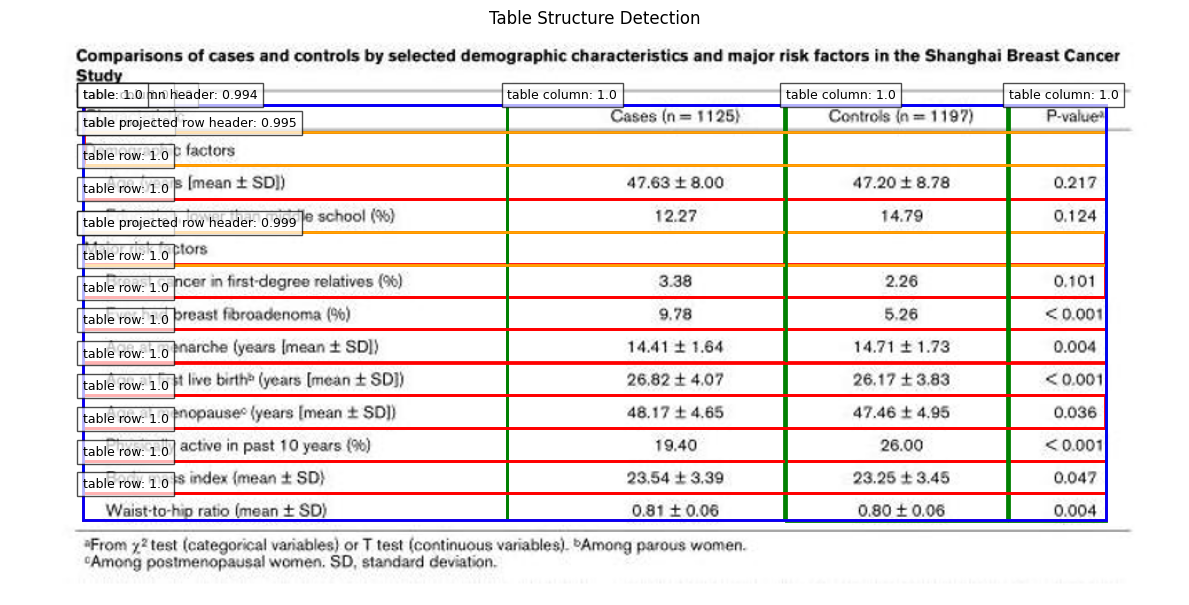

In [20]:
import os
import torch
import numpy as np
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from transformers import TableTransformerConfig, TableTransformerForObjectDetection, AutoFeatureExtractor

# ====== Paths ======
model_dir = "../table-transformer-structure-recognition"
image_path = "../PubTables-1M-Structure_Images_Val/PMC1064076_table_0.jpg"

# ====== Image preprocessing: resize and padding ======
def resize_and_pad(image, target_width=1000, padding=10):
    w_percent = (target_width / float(image.size[0]))
    h_size = int((float(image.size[1]) * float(w_percent)))
    image = image.resize((target_width, h_size), Image.BICUBIC)
    image = ImageOps.expand(image, border=padding, fill=(255, 255, 255))
    return image

image = Image.open(image_path).convert("RGB")
image = resize_and_pad(image)

# ====== Load model config and disable online backbone loading ======
config = TableTransformerConfig.from_pretrained(model_dir, local_files_only=True)
config.use_pretrained_backbone = False

# ====== Initialize model and feature extractor (offline) ======
structure_model = TableTransformerForObjectDetection.from_pretrained(
    model_dir,
    config=config,
    local_files_only=True
)
structure_model.eval()

feature_extractor = AutoFeatureExtractor.from_pretrained(model_dir, local_files_only=True)

# ====== Inference ======
inputs = feature_extractor(images=image, return_tensors="pt")
with torch.no_grad():
    outputs = structure_model(**inputs)

# ====== Post-processing with low threshold for better recall ======
target_sizes = torch.tensor([image.size[::-1]])
results = feature_extractor.post_process_object_detection(outputs, threshold=0.3, target_sizes=target_sizes)[0]

# ====== Debug output ======
print("Image size:", image.size)
print("Number of detections:", len(results['scores']))
print("Labels:", results["labels"])
print("Scores:", results["scores"])

# ====== Visualization ======
id2label = structure_model.config.id2label
colors = {
    'table': 'blue',
    'table column': 'green',
    'table row': 'red',
    'table column header': 'purple',
    'table projected row header': 'orange',
    'table spanning cell': 'brown'
}

fig, ax = plt.subplots(1, figsize=(12, 8))
ax.imshow(np.array(image))

if len(results["scores"]) == 0:
    print("No table structures detected.")
    plt.text(10, 30, "No structures detected", fontsize=14, color="red",
             bbox=dict(facecolor='white', alpha=0.8))
else:
    for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
        box = [round(i) for i in box.tolist()]
        x, y, x2, y2 = box
        width = x2 - x
        height = y2 - y

        label_name = id2label[label.item()]
        confidence = round(score.item(), 3)
        color = colors.get(label_name, 'cyan')

        rect = patches.Rectangle((x, y), width, height, linewidth=2, edgecolor=color, facecolor='none')
        ax.add_patch(rect)
        plt.text(x, y - 5, f"{label_name}: {confidence}", fontsize=9,
                 bbox=dict(facecolor='white', alpha=0.7))

plt.title("Table Structure Detection")
plt.axis('off')
plt.tight_layout()

# ====== Save visualization ======
save_folder = "."  # You can change this if needed
os.makedirs(save_folder, exist_ok=True)
plt.savefig(os.path.join(save_folder, "table_structure_visualization.png"), dpi=300)


In [22]:
from transformers import TableTransformerForObjectDetection, AutoFeatureExtractor
import torch
import matplotlib.pyplot as plt
import cv2
from paddleocr import PaddleOCR, draw_ocr

def categorize_boxes(results):
    headers = []  # Column headers (label 3)
    row_headers = []  # Row headers (label 4)
    spanning_cells = []  # Merged cells (label 5)
    rows = []
    columns = []

    for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
        if label == 1:
            columns.append({"box": box, "score": score})
        elif label == 2:
            rows.append({"box": box, "score": score})
        elif label == 3:
            headers.append({"box": box, "score": score})
        elif label == 4:
            row_headers.append({"box": box, "score": score})
        elif label == 5:
            spanning_cells.append({"box": box, "score": score})

    # Sort rows/columns by spatial order
    rows.sort(key=lambda x: x["box"][1])  # Sort by y1 (top to bottom)
    columns.sort(key=lambda x: x["box"][0])  # Sort by x1 (left to right)

    return {
        "headers": headers,
        "row_headers": row_headers,
        "spanning_cells": spanning_cells,
        "rows": rows,
        "columns": columns
    }

def assign_cells_to_grid(categorized):
    # Initialize empty grid: row x column
    grid = []
    for row in categorized["rows"]:
        row_cells = []
        y_min = row["box"][1]
        y_max = row["box"][3]
        for col in categorized["columns"]:
            x_min = col["box"][0]
            x_max = col["box"][2]
            box = [x_min, y_min, x_max, y_max]  # [left, top, right, bottom]
            row_cells.append(box)
        grid.append(row_cells)

    merge = []
    # Process row headers
    for r_header in categorized["row_headers"]:
        h_x1, h_y1, h_x2, h_y2 = r_header["box"]
        
        overlapping_cells = []
        # Find all cells that overlap >70% with this header
        for i, row in enumerate(grid):
            for j, cell in enumerate(row):
                if cell == None:
                    continue
                    
                c_x1, c_y1, c_x2, c_y2 = cell
                # Calculate intersection area
                int_x1 = max(h_x1, c_x1)
                int_y1 = max(h_y1, c_y1)
                int_x2 = min(h_x2, c_x2)
                int_y2 = min(h_y2, c_y2)
                
                if int_x2 > int_x1 and int_y2 > int_y1:  # If they intersect
                    int_area = (int_x2 - int_x1) * (int_y2 - int_y1)
                    overlap_ratio = int_area / ((c_x2 - c_x1) * (c_y2 - c_y1))
                    
                    if overlap_ratio > 0.7:
                        overlapping_cells.append((i, j))
        
        if overlapping_cells:
            # Sort by position (top-left first)
            #overlapping_cells.sort(key=lambda x: (x[0], x[1]))
            
            # Get merge range
            rows = [c[0] for c in overlapping_cells]
            cols = [c[1] for c in overlapping_cells]
            start_row, end_row = min(rows), max(rows)
            start_col, end_col = min(cols), max(cols)
            
            # Replace top-left cell with header box
            grid[start_row][start_col] = r_header["box"]

            # Set other cells to None
            for i, j in overlapping_cells[1:]:
                grid[i][j] = None

            merge.append([start_row, end_row, start_col, end_col])
    
    # Process spanning cells first (they override regular cells)
    for s_cell in categorized["spanning_cells"]:
        s_x1, s_y1, s_x2, s_y2 = s_cell["box"]
        
        overlapping_cells = []
        # Find all cells that overlap >70% with this header
        for i, row in enumerate(grid):
            for j, cell in enumerate(row):
                if cell == None:
                    continue
                    
                c_x1, c_y1, c_x2, c_y2 = cell
                # Calculate intersection area
                int_x1 = max(s_x1, c_x1)
                int_y1 = max(s_y1, c_y1)
                int_x2 = min(s_x2, c_x2)
                int_y2 = min(s_y2, c_y2)
                
                if int_x2 > int_x1 and int_y2 > int_y1:  # If they intersect
                    int_area = (int_x2 - int_x1) * (int_y2 - int_y1)
                    overlap_ratio = int_area / ((c_x2 - c_x1) * (c_y2 - c_y1))
                    
                    if overlap_ratio > 0.7:
                        overlapping_cells.append((i, j))
        
        if overlapping_cells:
            # Sort by position (top-left to bottom-right)
            #overlapping_cells.sort(key=lambda x: (x[0], x[1]))
            
            # Get merge range
            rows = [c[0] for c in overlapping_cells]
            cols = [c[1] for c in overlapping_cells]
            start_row, end_row = min(rows), max(rows)
            start_col, end_col = min(cols), max(cols)

            # Replace top-left cell with header box
            grid[start_row][start_col] = s_cell["box"]
            # Set other cells to None
            for i, j in overlapping_cells[1:]:
                grid[i][j] = None
            '''
            # Pick the MIDDLE cell instead of top-left
            mid_idx = len(overlapping_cells) // 2
            mid_i, mid_j = overlapping_cells[mid_idx]
            
            # Replace the middle cell with header box
            grid[mid_i][mid_j] = s_cell["box"]
            
            # Set other cells to None
            for idx, (i, j) in enumerate(overlapping_cells):
                if idx != mid_idx:  # Skip the middle cell
                    grid[i][j] = None
            '''
            merge.append([start_row, end_row, start_col, end_col])

    return grid, merge

def custom_grayscale_threshold(bgr_img, threshold=382):
    """
    Convert BGR image to grayscale using sum of 2 strongest channels,
    then apply binary thresholding.
    
    Args:
        bgr_img: Input BGR image (OpenCV format)
        threshold: Pixels > threshold become 255, else 0
    
    Returns:
        Binary image (0 or 255)
    """
    # Split channels
    b, g, r = cv2.split(bgr_img)
    
    # For each pixel, sum the 2 strongest channels
    strongest_two = np.maximum.reduce([b, g, r]) + np.median(np.stack([b, g, r]), axis=0)
    
    # Apply threshold
    binary = (strongest_two > threshold).astype(np.uint8) * 255
    
    return binary
    
def extract_table_text(image, grid, multiplier = 4, margin = 4):
    cv2_image = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)
    # Enlarge the image
    cv2_image = cv2.resize(cv2_image, None, fx=multiplier, fy=multiplier, interpolation=cv2.INTER_CUBIC)
    # Set threshold to create sharp edge, the larger the thicker line
    cv2_image = custom_grayscale_threshold(cv2_image, threshold=400) 
    # Make your settings for the OCR
    ocr = PaddleOCR(
        lang='en',
        det=False,
        rec=True,
        rec_image_shape="3, 96, 640",
        use_angle_cls=False,
    )
    table_data = []

    for row_cells in grid:
        row_texts = []
        for box in row_cells:
            if box is None:
                cell_text = ''
            else:
                x_min, y_min, x_max, y_max = map(int, box)
                cell_crop = cv2_image[y_min*multiplier-margin:y_max*multiplier+margin, x_min*multiplier-margin:x_max*multiplier+margin]
                print(cell_crop.shape)
                plt.imshow(cell_crop, cmap='gray', vmin=0, vmax=255)
                plt.axis('off')
                plt.show()
                result = ocr.ocr(cell_crop)
                if result[0]:
                    cell_text = ' '.join([line[1][0] for line in result[0]])
                else:
                    cell_text = ''
            row_texts.append(cell_text)
        table_data.append(row_texts)

    return table_data

def export_to_excel(table_data, merge, output_path="table_output.xlsx"):
    from openpyxl import Workbook
    from openpyxl.utils import get_column_letter

    wb = Workbook()
    ws = wb.active

    # Write data
    for row_idx, row_data in enumerate(table_data, 1):
        for col_idx, text in enumerate(row_data, 1):
            ws.cell(row=row_idx, column=col_idx, value=text)

    for start_row, end_row, start_col, end_col in merge:      
        ws.merge_cells(start_row=start_row+1, end_row=end_row+1, start_column=start_col+1, end_column=end_col+1)

    wb.save(output_path)

Some weights of the model checkpoint at ../table-transformer-structure-recognition were not used when initializing TableTransformerForObjectDetection: ['model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing TableTransformerForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TableTransformerForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


[2025/05/28 14:08:54] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/home/z890/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/home/z890/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length

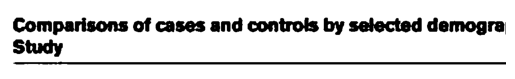

[2025/05/28 14:08:54] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/28 14:08:54] ppocr DEBUG: dt_boxes num : 2, elapsed : 0.07292890548706055
[2025/05/28 14:08:54] ppocr DEBUG: rec_res num  : 2, elapsed : 0.1397111415863037
(132, 624)


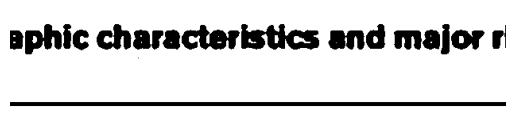

[2025/05/28 14:08:54] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/28 14:08:54] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.05428743362426758
[2025/05/28 14:08:54] ppocr DEBUG: rec_res num  : 1, elapsed : 0.0540468692779541
(132, 536)


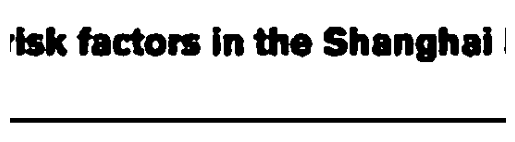

[2025/05/28 14:08:54] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/28 14:08:54] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.04840850830078125
[2025/05/28 14:08:54] ppocr DEBUG: rec_res num  : 1, elapsed : 0.050171613693237305
(132, 276)


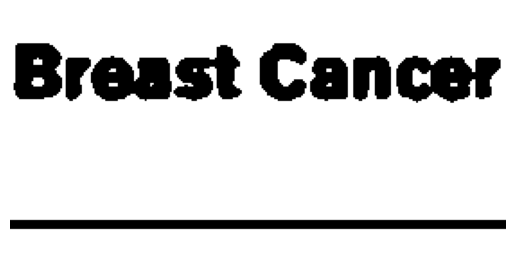

[2025/05/28 14:08:54] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/28 14:08:54] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.03413510322570801
[2025/05/28 14:08:54] ppocr DEBUG: rec_res num  : 1, elapsed : 0.03933238983154297
(96, 1100)


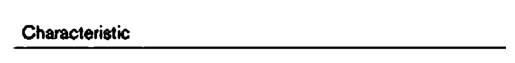

[2025/05/28 14:08:54] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/28 14:08:55] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.07250142097473145
[2025/05/28 14:08:55] ppocr DEBUG: rec_res num  : 1, elapsed : 0.03277850151062012
(96, 624)


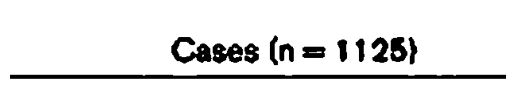

[2025/05/28 14:08:55] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/28 14:08:55] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.05106782913208008
[2025/05/28 14:08:55] ppocr DEBUG: rec_res num  : 1, elapsed : 0.03558015823364258
(96, 536)


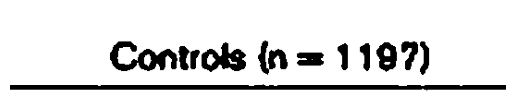

[2025/05/28 14:08:55] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/28 14:08:55] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.04702949523925781
[2025/05/28 14:08:55] ppocr DEBUG: rec_res num  : 1, elapsed : 0.039392709732055664
(96, 276)


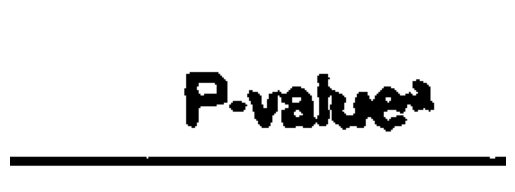

[2025/05/28 14:08:55] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/28 14:08:55] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.03256797790527344
[2025/05/28 14:08:55] ppocr DEBUG: rec_res num  : 1, elapsed : 0.01844477653503418
(88, 1100)


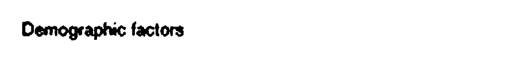

[2025/05/28 14:08:55] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/28 14:08:55] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.06540966033935547
[2025/05/28 14:08:55] ppocr DEBUG: rec_res num  : 1, elapsed : 0.03584742546081543
(88, 624)


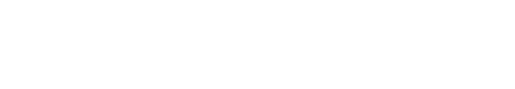

[2025/05/28 14:08:55] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/28 14:08:55] ppocr DEBUG: dt_boxes num : 0, elapsed : 0.013099908828735352
[2025/05/28 14:08:55] ppocr DEBUG: rec_res num  : 0, elapsed : 4.76837158203125e-07
(88, 536)


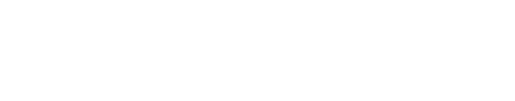

[2025/05/28 14:08:55] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/28 14:08:55] ppocr DEBUG: dt_boxes num : 0, elapsed : 0.011694192886352539
[2025/05/28 14:08:55] ppocr DEBUG: rec_res num  : 0, elapsed : 4.76837158203125e-07
(88, 276)


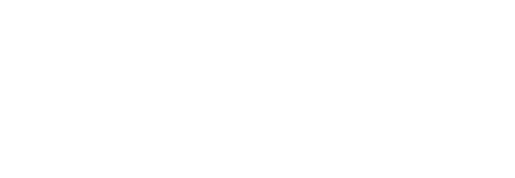

[2025/05/28 14:08:55] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/28 14:08:55] ppocr DEBUG: dt_boxes num : 0, elapsed : 0.008798360824584961
[2025/05/28 14:08:55] ppocr DEBUG: rec_res num  : 0, elapsed : 4.76837158203125e-07
(88, 1100)


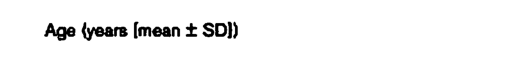

[2025/05/28 14:08:55] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/28 14:08:55] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.011405229568481445
[2025/05/28 14:08:55] ppocr DEBUG: rec_res num  : 1, elapsed : 0.04130053520202637
(88, 624)


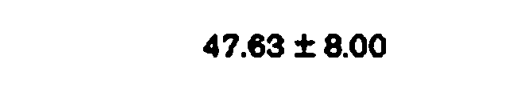

[2025/05/28 14:08:55] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/28 14:08:55] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.016626596450805664
[2025/05/28 14:08:55] ppocr DEBUG: rec_res num  : 1, elapsed : 0.03549933433532715
(88, 536)


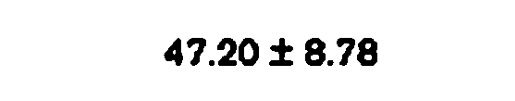

[2025/05/28 14:08:55] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/28 14:08:55] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.012518644332885742
[2025/05/28 14:08:55] ppocr DEBUG: rec_res num  : 1, elapsed : 0.02754521369934082
(88, 276)


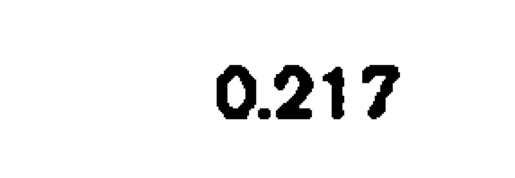

[2025/05/28 14:08:55] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/28 14:08:55] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.011009693145751953
[2025/05/28 14:08:55] ppocr DEBUG: rec_res num  : 1, elapsed : 0.019262075424194336
(88, 1100)


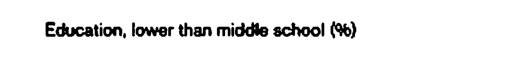

[2025/05/28 14:08:55] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/28 14:08:55] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.012129068374633789
[2025/05/28 14:08:55] ppocr DEBUG: rec_res num  : 1, elapsed : 0.06333374977111816
(88, 624)


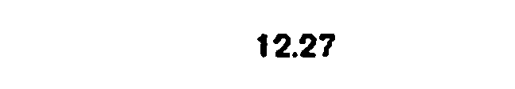

[2025/05/28 14:08:55] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/28 14:08:55] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.013761281967163086
[2025/05/28 14:08:55] ppocr DEBUG: rec_res num  : 1, elapsed : 0.01919865608215332
(88, 536)


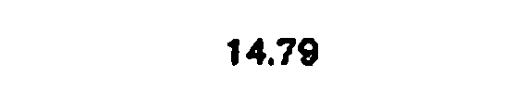

[2025/05/28 14:08:55] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/28 14:08:55] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.013397932052612305
[2025/05/28 14:08:55] ppocr DEBUG: rec_res num  : 1, elapsed : 0.01964735984802246
(88, 276)


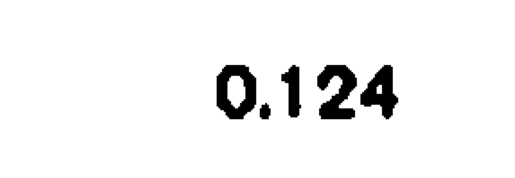

[2025/05/28 14:08:55] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/28 14:08:55] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.012159585952758789
[2025/05/28 14:08:55] ppocr DEBUG: rec_res num  : 1, elapsed : 0.020061492919921875
(88, 2504)


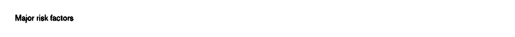

[2025/05/28 14:08:56] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/28 14:08:56] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.07184743881225586
[2025/05/28 14:08:56] ppocr DEBUG: rec_res num  : 1, elapsed : 0.021871566772460938
(88, 1100)


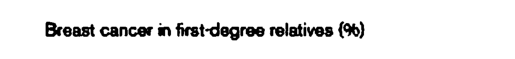

[2025/05/28 14:08:56] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/28 14:08:56] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.013402223587036133
[2025/05/28 14:08:56] ppocr DEBUG: rec_res num  : 1, elapsed : 0.05652928352355957
(88, 624)


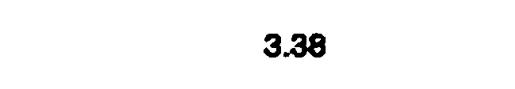

[2025/05/28 14:08:56] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/28 14:08:56] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.014619112014770508
[2025/05/28 14:08:56] ppocr DEBUG: rec_res num  : 1, elapsed : 0.01977086067199707
(88, 536)


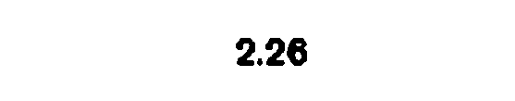

[2025/05/28 14:08:56] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/28 14:08:56] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.012744903564453125
[2025/05/28 14:08:56] ppocr DEBUG: rec_res num  : 1, elapsed : 0.0196988582611084
(88, 276)


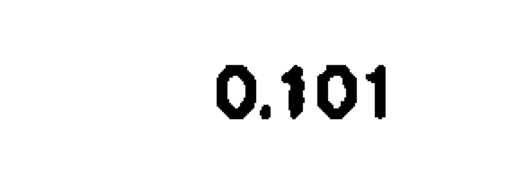

[2025/05/28 14:08:56] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/28 14:08:56] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.009604215621948242
[2025/05/28 14:08:56] ppocr DEBUG: rec_res num  : 1, elapsed : 0.01972055435180664
(88, 1100)


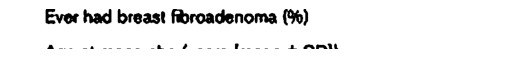

[2025/05/28 14:08:56] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/28 14:08:56] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.011818647384643555
[2025/05/28 14:08:56] ppocr DEBUG: rec_res num  : 1, elapsed : 0.06004643440246582
(88, 624)


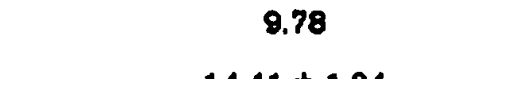

[2025/05/28 14:08:56] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/28 14:08:56] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.013471603393554688
[2025/05/28 14:08:56] ppocr DEBUG: rec_res num  : 1, elapsed : 0.01995110511779785
(88, 536)


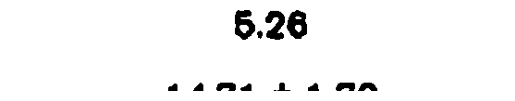

[2025/05/28 14:08:56] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/28 14:08:56] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.01213526725769043
[2025/05/28 14:08:56] ppocr DEBUG: rec_res num  : 1, elapsed : 0.01868152618408203
(88, 276)


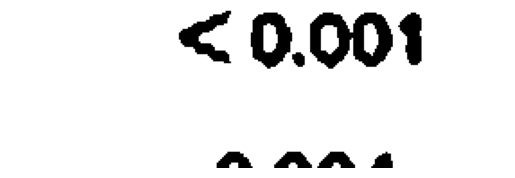

[2025/05/28 14:08:56] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/28 14:08:56] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.008849620819091797
[2025/05/28 14:08:56] ppocr DEBUG: rec_res num  : 1, elapsed : 0.018421649932861328
(84, 1100)


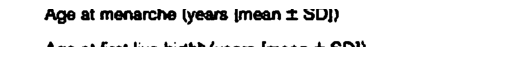

[2025/05/28 14:08:56] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/28 14:08:56] ppocr DEBUG: dt_boxes num : 3, elapsed : 0.011798858642578125
[2025/05/28 14:08:56] ppocr DEBUG: rec_res num  : 3, elapsed : 0.08115768432617188
(84, 624)


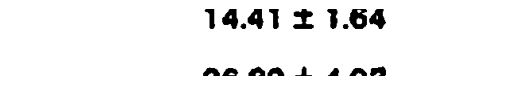

[2025/05/28 14:08:56] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/28 14:08:56] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.013353824615478516
[2025/05/28 14:08:56] ppocr DEBUG: rec_res num  : 1, elapsed : 0.040615081787109375
(84, 536)


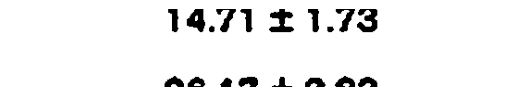

[2025/05/28 14:08:56] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/28 14:08:56] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.014775514602661133
[2025/05/28 14:08:56] ppocr DEBUG: rec_res num  : 1, elapsed : 0.025313377380371094
(84, 276)


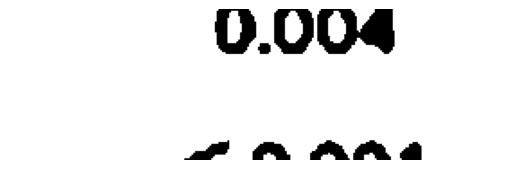

[2025/05/28 14:08:56] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/28 14:08:56] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.009835481643676758
[2025/05/28 14:08:56] ppocr DEBUG: rec_res num  : 1, elapsed : 0.020879507064819336
(88, 1100)


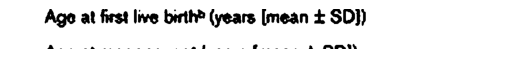

[2025/05/28 14:08:56] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/28 14:08:56] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.012627124786376953
[2025/05/28 14:08:56] ppocr DEBUG: rec_res num  : 1, elapsed : 0.050284624099731445
(88, 624)


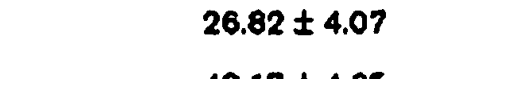

[2025/05/28 14:08:56] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/28 14:08:56] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.013729572296142578
[2025/05/28 14:08:56] ppocr DEBUG: rec_res num  : 1, elapsed : 0.03716254234313965
(88, 536)


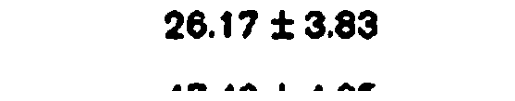

[2025/05/28 14:08:56] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/28 14:08:56] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.01255345344543457
[2025/05/28 14:08:57] ppocr DEBUG: rec_res num  : 1, elapsed : 0.02951335906982422
(88, 276)


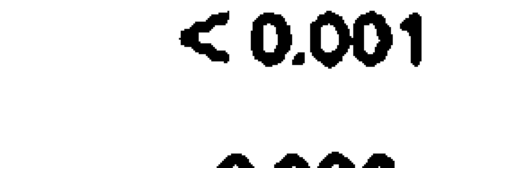

[2025/05/28 14:08:57] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/28 14:08:57] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.009628772735595703
[2025/05/28 14:08:57] ppocr DEBUG: rec_res num  : 1, elapsed : 0.019557714462280273
(84, 1100)


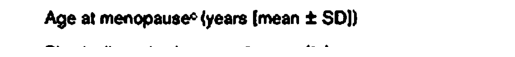

[2025/05/28 14:08:57] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/28 14:08:57] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.01195669174194336
[2025/05/28 14:08:57] ppocr DEBUG: rec_res num  : 1, elapsed : 0.05951285362243652
(84, 624)


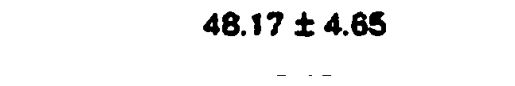

[2025/05/28 14:08:57] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/28 14:08:57] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.01367640495300293
[2025/05/28 14:08:57] ppocr DEBUG: rec_res num  : 1, elapsed : 0.03544735908508301
(84, 536)


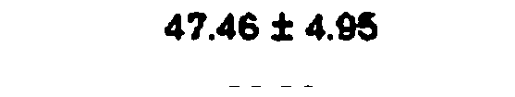

[2025/05/28 14:08:57] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/28 14:08:57] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.012781858444213867
[2025/05/28 14:08:57] ppocr DEBUG: rec_res num  : 1, elapsed : 0.034865617752075195
(84, 276)


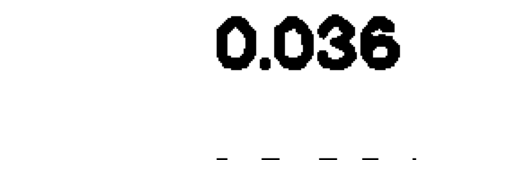

[2025/05/28 14:08:57] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/28 14:08:57] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.008952140808105469
[2025/05/28 14:08:57] ppocr DEBUG: rec_res num  : 1, elapsed : 0.019240617752075195
(88, 1100)


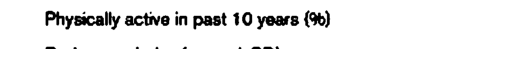

[2025/05/28 14:08:57] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/28 14:08:57] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.012535810470581055
[2025/05/28 14:08:57] ppocr DEBUG: rec_res num  : 1, elapsed : 0.05583524703979492
(88, 624)


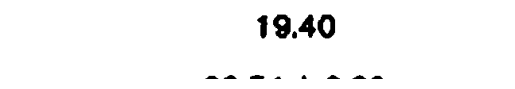

[2025/05/28 14:08:57] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/28 14:08:57] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.013605594635009766
[2025/05/28 14:08:57] ppocr DEBUG: rec_res num  : 1, elapsed : 0.02100992202758789
(88, 536)


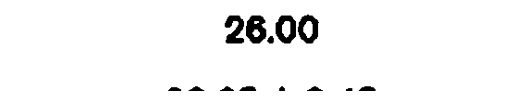

[2025/05/28 14:08:57] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/28 14:08:57] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.012996673583984375
[2025/05/28 14:08:57] ppocr DEBUG: rec_res num  : 1, elapsed : 0.01918816566467285
(88, 276)


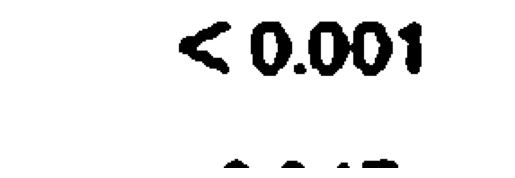

[2025/05/28 14:08:57] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/28 14:08:57] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.00930166244506836
[2025/05/28 14:08:57] ppocr DEBUG: rec_res num  : 1, elapsed : 0.01853775978088379
(88, 1100)


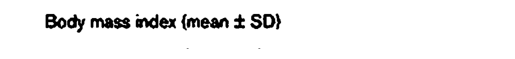

[2025/05/28 14:08:57] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/28 14:08:57] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.011091232299804688
[2025/05/28 14:08:57] ppocr DEBUG: rec_res num  : 1, elapsed : 0.045377254486083984
(88, 624)


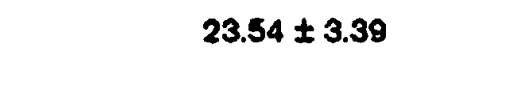

[2025/05/28 14:08:57] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/28 14:08:57] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.014812946319580078
[2025/05/28 14:08:57] ppocr DEBUG: rec_res num  : 1, elapsed : 0.03485512733459473
(88, 536)


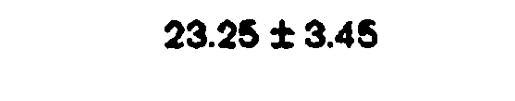

[2025/05/28 14:08:57] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/28 14:08:57] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.011921405792236328
[2025/05/28 14:08:57] ppocr DEBUG: rec_res num  : 1, elapsed : 0.03632807731628418
(88, 276)


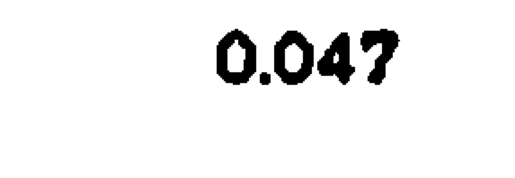

[2025/05/28 14:08:57] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/05/28 14:08:57] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.008856058120727539
[2025/05/28 14:08:57] ppocr DEBUG: rec_res num  : 1, elapsed : 0.018659353256225586


In [23]:
import os
import torch
from PIL import Image, ImageOps
from transformers import TableTransformerConfig, TableTransformerForObjectDetection, AutoFeatureExtractor

# ====== Paths ======
model_dir = "../table-transformer-structure-recognition"
image_path = "../PubTables-1M-Structure_Images_Val/PMC1064076_table_0.jpg"

# ====== Load image and apply padding ======
def add_edge_padding(image, padding=20):
    """
    Add white padding around the image.

    Args:
        image (PIL.Image): Input image
        padding (int): Number of pixels to pad on each side

    Returns:
        Padded PIL.Image
    """
    white_color = (255, 255, 255)
    return ImageOps.expand(image, border=padding, fill=white_color)

image = Image.open(image_path).convert("RGB")
image = add_edge_padding(image)

# ====== Load model config & disable online backbone download ======
config = TableTransformerConfig.from_pretrained(model_dir, local_files_only=True)
config.use_pretrained_backbone = False

# ====== Load model and feature extractor from local files ======
structure_model = TableTransformerForObjectDetection.from_pretrained(
    model_dir,
    config=config,
    local_files_only=True
)
structure_model.eval()

feature_extractor = AutoFeatureExtractor.from_pretrained(model_dir, local_files_only=True)

# ====== Inference ======
inputs = feature_extractor(images=image, return_tensors="pt")
with torch.no_grad():
    outputs = structure_model(**inputs)

# ====== Post-process outputs ======
target_sizes = torch.tensor([image.size[::-1]])
results = feature_extractor.post_process_object_detection(outputs, threshold=0.9, target_sizes=target_sizes)[0]

# ====== Table structure processing (assuming you defined these functions) ======
categorized = categorize_boxes(results)
grid, merge = assign_cells_to_grid(categorized)
table_data = extract_table_text(image, grid)
export_to_excel(table_data, merge)


In [24]:
import pandas as pd

# Load the Excel file
df = pd.read_excel('table_output.xlsx', engine='openpyxl')  # replace with your file path

# Display the content
print(df)

   Comparisons of cases and controls by selected demogra Study  \
0                                      Characteristic            
1                                 Demographic factors            
2                               Age (years [mean  SD]            
3            Education, lower than middte school (%6)            
4                                  Major risk factors            
5        Breast cancer in first-degree relatives (96)            
6                    sver had breast fbroadenoma (%0)            
7                                     Ago at menarcne            
8                                  (years [mean  SDl)            
9                Age at menopause~ (years (mean  SD])            
10            Physically active in past 10 years (9b)            
11                           Body mass dex (mean  SD)            

   aphic characteristics and major . Isk factors in the Shangha. Breast Cancer  
0                  Cases (n - 1 125)         Controls (n - 1